In [25]:
%reset -f

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
from scipy.stats import multivariate_normal
mat = scipy.io.loadmat('TrainDATAtoyGaussian2D.mat')


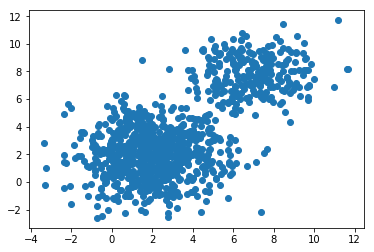

In [27]:
x1=1.75*np.random.randn(750,2)+np.array([2,2])
x2=1.5*np.random.randn(250,2)+np.array([7,8])
data=np.concatenate((x2,x1),axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [28]:
mu_initial=np.array([[0,3],[0,0]])
var_initial=np.array([[.4,.8],[.6, .7]])
pi_initial=np.array([.5,.5])
epsilon=0.01
Q_func_new=1
Q_func=0
C=2
counter=0;


In [29]:
pi_initial.shape

(2,)

In [30]:
x=data
n=len(x)
try:
    d=len(x[0])
except:
    d=1
print(n,d)


1000 2


In [31]:
while(Q_func_new-Q_func>epsilon):
    a_ij=np.zeros((n,C))
    h_ij=np.zeros((n,C))
    log_normal=np.zeros((n,C))
    for i in range(C):
        a_ij[:,i]=multivariate_normal.pdf(x,mu_initial[:,i].T,np.diag(var_initial[:,i]))


    for i in range(C):
        h_ij[:,i]=(a_ij[:,i]*pi_initial[i])/np.matmul(a_ij,pi_initial)

    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[:,i].T,np.diag(var_initial[:,i]))*pi_initial[i])


    Q_func=0

    for i in range(C):
            Q_func+=np.dot(h_ij[:,i].T,log_normal[:,i])

    pi_initial=sum(h_ij)/n    
    mu_initial=np.dot(x.T,h_ij)/sum(h_ij)

    for i in range(C):
        for j in range(d):
            var_initial[j,i]=np.dot(h_ij[:,i],((x[:,j]- mu_initial[j,i])**2))/sum(h_ij[:,i])



    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[:,i].T,np.diag(var_initial[:,i]))*pi_initial[i])

    Q_func_new=0

    for i in range(C):
            Q_func_new+=np.dot(h_ij[:,i].T,log_normal[:,i])


In [32]:
mu_initial

array([[2.01649443, 6.96955084],
       [1.95427528, 7.85052825]])

In [33]:
 var_initial


array([[3.21140175, 2.58922282],
       [3.0612671 , 1.8673946 ]])

In [34]:
pi_initial

array([0.74767133, 0.25232867])